# Instalação das bibliotecas necessárias

In [ ]:
!pip install imbalanced-learn --quiet
!pip install pandas_profiling --quiet
!pip install -U scikit-learn --quiet


# Importação das bibliotecas

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from imblearn.combine import SMOTEENN
from sklearn.model_selection import train_test_split, cross_val_score, KFold
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, RandomForestRegressor
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix, f1_score
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.metrics import mean_absolute_error, mean_squared_error, mean_absolute_percentage_error


#Carregamento dos dados do dataset

In [ ]:
attributes = pd.read_csv("attributes.csv")
data_set = pd.read_csv("data_set.csv")

#1. Análise exploratória e pré-processamento:

##1.1 Verificar valores ausentes

In [ ]:
missing_values = data_set.isnull().sum()
print("Valores ausentes por coluna:")
print(missing_values)

Valores ausentes por coluna:
VDRL_RESULT          0
CONS_ALCOHOL         0
RH_FACTOR            0
SMOKER               0
PLAN_PREGNANCY       0
BLOOD_GROUP          0
HAS_PREG_RISK        0
TET_VACCINE          0
IS_HEAD_FAMILY       0
MARITAL_STATUS       0
FOOD_INSECURITY      0
NUM_ABORTIONS        0
NUM_LIV_CHILDREN     0
NUM_PREGNANCIES      0
FAM_PLANNING         0
TYPE_HOUSE           0
HAS_FAM_INCOME       0
LEVEL_SCHOOLING      0
CONN_SEWER_NET       0
NUM_RES_HOUSEHOLD    0
HAS_FRU_TREE         0
HAS_VEG_GARDEN       0
FAM_INCOME           0
HOUSING_STATUS       0
WATER_TREATMENT      0
AGE                  0
dtype: int64


Não foram detectados valores ausentes em nenhuma das colunas dos datasets.

##1.1.2 Verificação de valores redundantes

In [ ]:
duplicates = data_set.duplicated().sum()
num_records = data_set.shape[0]
percentage_of_duplicates = duplicates*100/num_records
print(f"Número de linhas duplicadas: {duplicates}")
print(f"O dataset contém {num_records} registros.")
print(f"A quantidade de linhas duplicadas corresponde a {percentage_of_duplicates:.2f} % do dataset")

Número de linhas duplicadas: 833
O dataset contém 41762 registros.
A quantidade de linhas duplicadas corresponde a 1.99 % do dataset


Levando em consideração que os registros duplicados correspondem a apenas 2% do total dos dados e que não há evidências concretas de que esses dados repetidos sejam resultado de erros ou inconsistências na entrada de dados, optamos por manter os registros duplicados.

Além disso, há a possibilidade de que tais registros representem ocorrências válidas e repetidas por natureza, como diferentes indivíduos com características idênticas. Remover esses registros poderia comprometer a representatividade do dataset, influenciando potencialmente os resultados e análises subsequentes. Por esse motivo, decidimos preservar os registros duplicados no conjunto de dados.

##1.2 Estatísticas descritivas

In [ ]:
print(data_set.describe(include='all'))

        VDRL_RESULT  CONS_ALCOHOL     RH_FACTOR        SMOKER  PLAN_PREGNANCY  \
count  41762.000000  41762.000000  41762.000000  41762.000000    41762.000000   
mean       0.980221      1.068890      0.714789      1.040683        0.648700   
std        0.139241      0.353034      0.931219      0.331452        0.573161   
min        0.000000      0.000000      0.000000      0.000000        0.000000   
25%        1.000000      1.000000      0.000000      1.000000        0.000000   
50%        1.000000      1.000000      0.000000      1.000000        1.000000   
75%        1.000000      1.000000      2.000000      1.000000        1.000000   
max        1.000000      2.000000      2.000000      2.000000        2.000000   

        BLOOD_GROUP  HAS_PREG_RISK   TET_VACCINE  IS_HEAD_FAMILY  \
count  41762.000000   41762.000000  41762.000000    41762.000000   
mean       1.810474       0.918299      0.164911        0.960251   
std        1.676994       0.412945      0.475779        0.499563  

A partir da visualização das estatísticas descritivas, foi possível identificar um possível desbalanceamento na amostragem do VRL_Result, considerando que se trata de uma variável categórica que possui como valores padrões 1 e 0, uma média de 0,98 (valor muito distante de 0,5), denuncia que as amostras com resultado positivo foi muito superior às amostras com resultados negativos.

Além disso foi possível verificar que a média de idade das mulheres que participaram da coleta de dados foi de 25 anos.

##1.3 Visualizar correlações

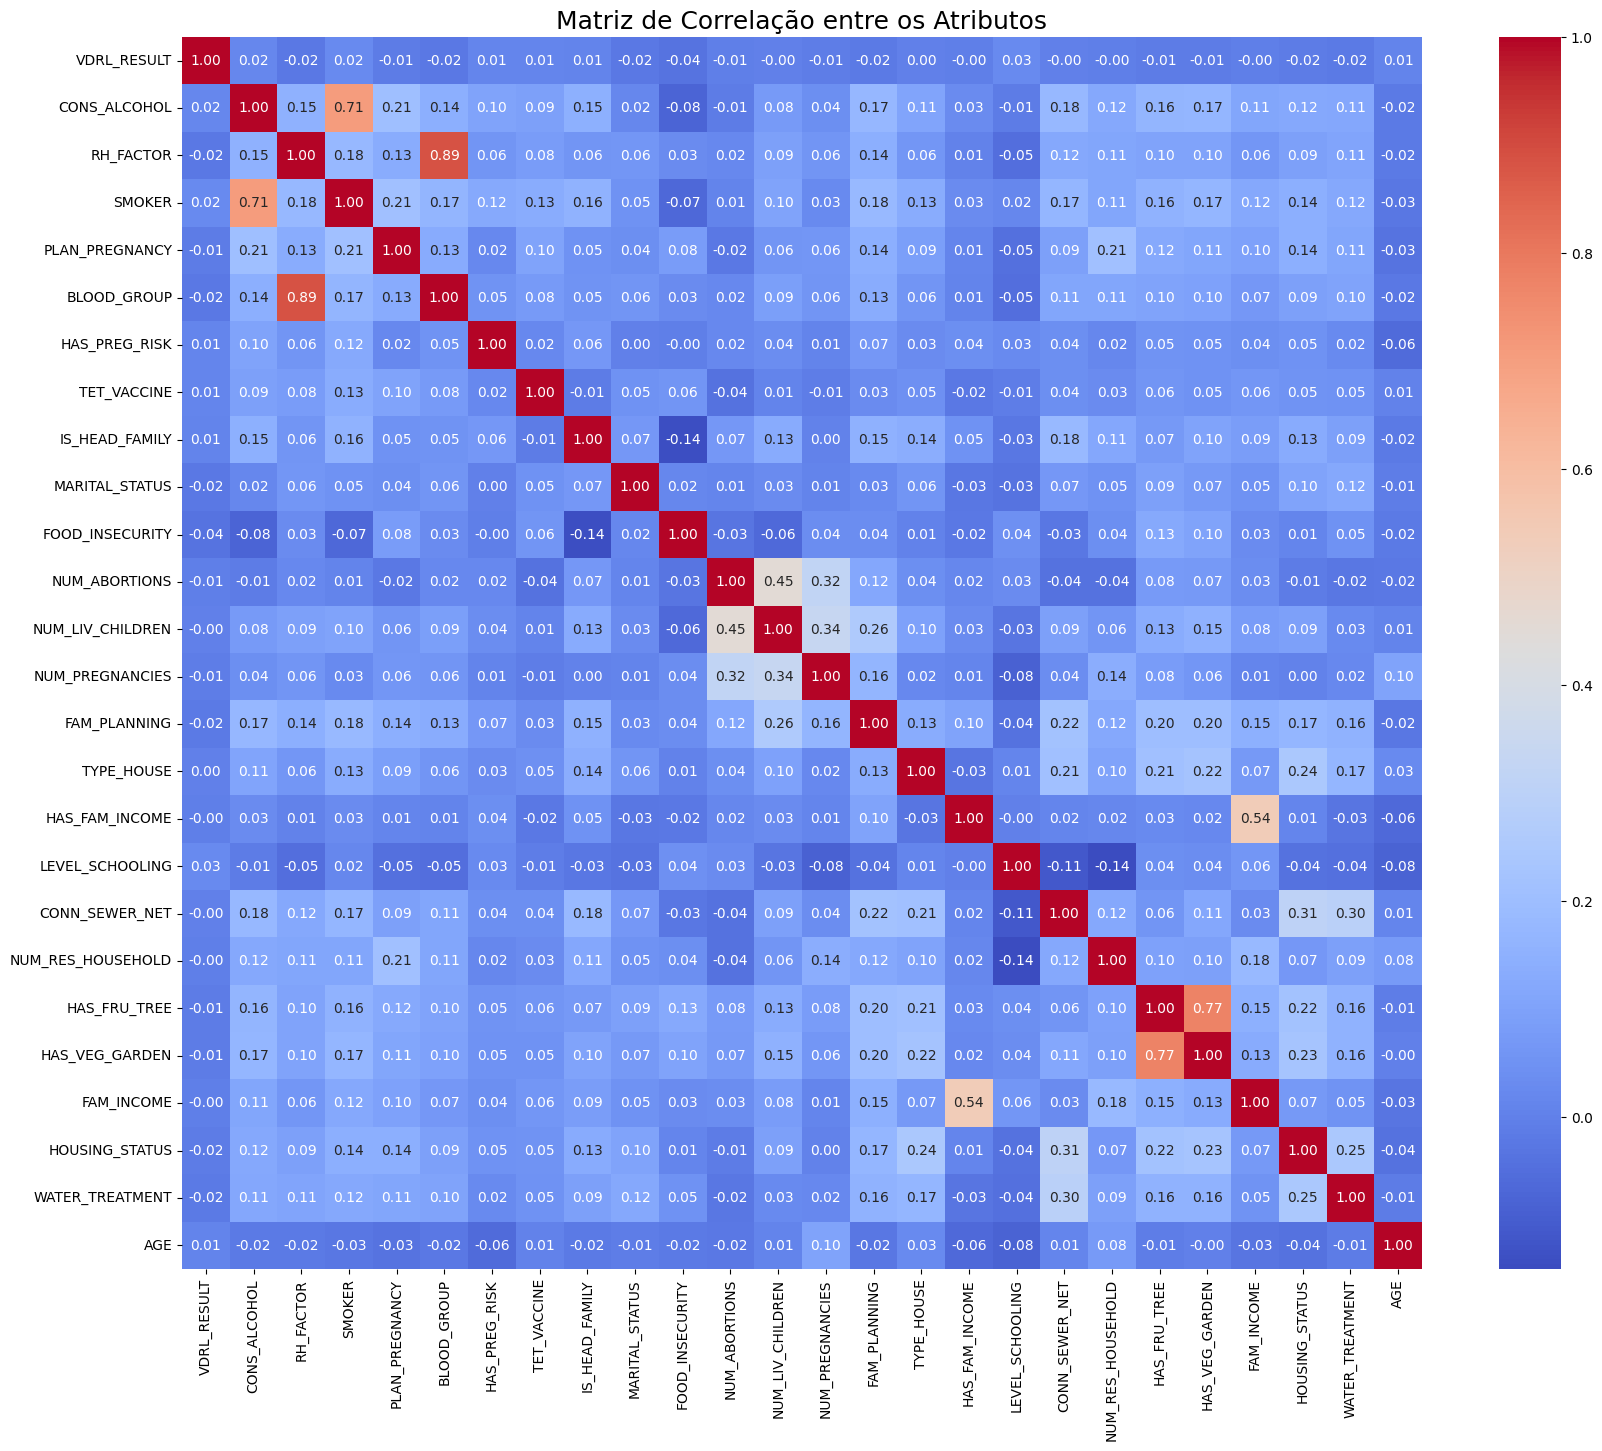

In [ ]:
correlation_matrix = data_set.corr()

# Plotar a matriz de correlação
plt.figure(figsize=(20, 16))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap="coolwarm", cbar=True)
plt.title("Matriz de Correlação entre os Atributos", fontsize=18)
plt.show()

###1.3.1 Selecionar correlações fortes com VDRL_RESULT

In [ ]:
# Selecionar correlações fortes com VDRL_RESULT
age_correlation = correlation_matrix['VDRL_RESULT'].sort_values(ascending=False)
print("Correlação das variáveis com VDRL_RESULT:")
print(age_correlation)

Correlação das variáveis com VDRL_RESULT:
VDRL_RESULT          1.000000
LEVEL_SCHOOLING      0.028181
SMOKER               0.024699
CONS_ALCOHOL         0.017003
TET_VACCINE          0.014175
HAS_PREG_RISK        0.013541
IS_HEAD_FAMILY       0.010385
AGE                  0.008157
TYPE_HOUSE           0.001421
NUM_LIV_CHILDREN    -0.000316
CONN_SEWER_NET      -0.001428
FAM_INCOME          -0.002576
NUM_RES_HOUSEHOLD   -0.003386
HAS_FAM_INCOME      -0.003688
NUM_ABORTIONS       -0.005773
NUM_PREGNANCIES     -0.007890
HAS_FRU_TREE        -0.013165
PLAN_PREGNANCY      -0.014154
HAS_VEG_GARDEN      -0.014781
HOUSING_STATUS      -0.015091
WATER_TREATMENT     -0.016962
FAM_PLANNING        -0.017175
MARITAL_STATUS      -0.022555
BLOOD_GROUP         -0.023130
RH_FACTOR           -0.023747
FOOD_INSECURITY     -0.035950
Name: VDRL_RESULT, dtype: float64


###1.3.2 Selecionar correlações fortes com AGE

In [ ]:
# Selecionar correlações fortes com AGE
age_correlation = correlation_matrix['AGE'].sort_values(ascending=False)
print("Correlação das variáveis com AGE:")
print(age_correlation)

Correlação das variáveis com AGE:
AGE                  1.000000
NUM_PREGNANCIES      0.100398
NUM_RES_HOUSEHOLD    0.076008
TYPE_HOUSE           0.027112
CONN_SEWER_NET       0.014398
VDRL_RESULT          0.008157
NUM_LIV_CHILDREN     0.007889
TET_VACCINE          0.006637
HAS_VEG_GARDEN      -0.002191
HAS_FRU_TREE        -0.007589
MARITAL_STATUS      -0.009693
WATER_TREATMENT     -0.014996
IS_HEAD_FAMILY      -0.015685
CONS_ALCOHOL        -0.016127
RH_FACTOR           -0.016265
FOOD_INSECURITY     -0.016588
BLOOD_GROUP         -0.020460
NUM_ABORTIONS       -0.023012
FAM_PLANNING        -0.024778
SMOKER              -0.026080
FAM_INCOME          -0.031472
PLAN_PREGNANCY      -0.034227
HOUSING_STATUS      -0.042238
HAS_PREG_RISK       -0.057977
HAS_FAM_INCOME      -0.060380
LEVEL_SCHOOLING     -0.080134
Name: AGE, dtype: float64


A partir dos dados obtidos através da matrix de correlação verificou-se que nenhuma das colunas possuia uma forte correlação com as variáveis VDRL_RESULT e AGE.  

Contudo, dentre as variáveis disponíveis, as que possuiam uma maior correlação com a variável VDRL_RESULT foram:


LEVEL_SCHOOLING,
SMOKER,
CONS_ALCOHOL,
TET_VACCINE,
HAS_PREG_RISK,
itemize

Enquanto as variáveis que possuiam uma maior correlação com a variável AGE foram:

 NUM_PREGNANCIES,
 NUM_RES_HOUSEHOLD,
 TYPE_HOUSE,
 CONN_SEWER_NET,
 VDRL_RESULT.



###1.4 Distribuição das classes

###1.4.1 Entender a distribuição da coluna VDRL_RESULT

VDRL_RESULT
1.0    98.022125
0.0     1.977875
Name: proportion, dtype: float64


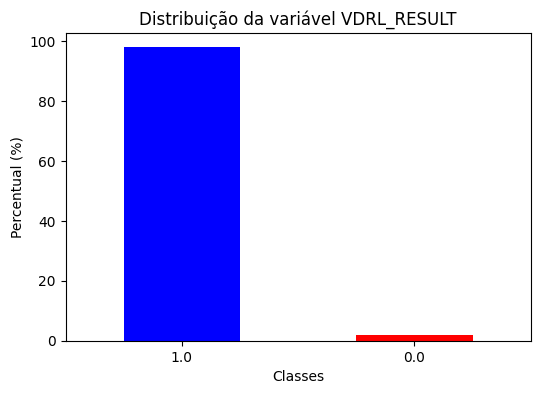

In [ ]:
vdrl_distribution = data_set['VDRL_RESULT'].value_counts(normalize=True) * 100

print(vdrl_distribution)

# Gráfico de barras
plt.figure(figsize=(6, 4))
vdrl_distribution.plot(kind='bar', color=['blue', 'red', 'gray'])
plt.title("Distribuição da variável VDRL_RESULT")
plt.xlabel("Classes")
plt.ylabel("Percentual (%)")
plt.xticks(rotation=0)
plt.show()

Observou-se um desbalanceamento significativo entre as amostras da classe VDRL_RESULT.

###1.4.2 Entender a distribuição da coluna AGE

count    41762.000000
mean        25.191729
std          4.561691
min         -3.000000
25%         25.000000
50%         25.000000
75%         25.000000
max         51.000000
Name: AGE, dtype: float64


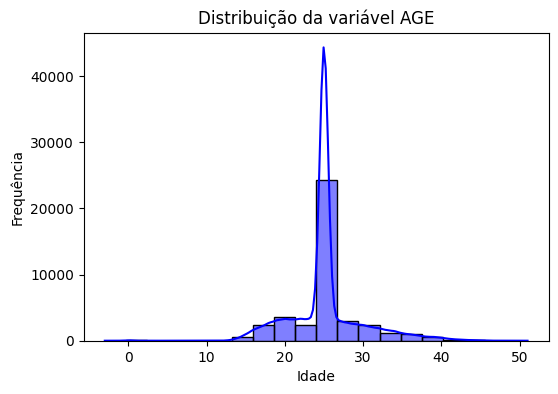

In [ ]:
print(data_set['AGE'].describe())

# Histograma para verificar a distribuição
plt.figure(figsize=(6, 4))
sns.histplot(data_set['AGE'], bins=20, kde=True, color='blue')
plt.title("Distribuição da variável AGE")
plt.xlabel("Idade")
plt.ylabel("Frequência")
plt.show()

Observou-se uma grande concentração de registros na marca dos 25 anos.

##1.5 Identificação de possíveis outliers

Q1: 25.0, Q3: 25.0, IQR: 0.0


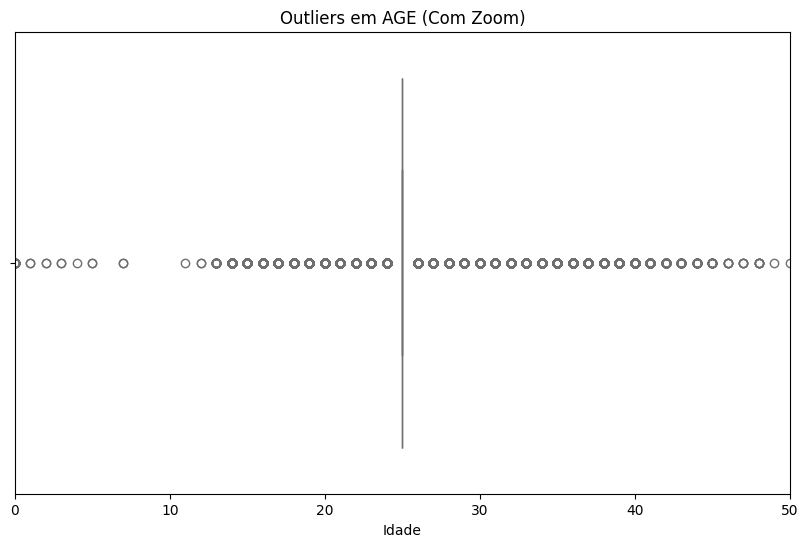

In [ ]:
Q1 = data_set['AGE'].quantile(0.25)
Q3 = data_set['AGE'].quantile(0.75)
IQR = Q3 - Q1
print(f"Q1: {Q1}, Q3: {Q3}, IQR: {IQR}")

# Boxplot para identificar outliers em AGE
plt.figure(figsize=(10, 6))
sns.boxplot(x=data_set['AGE'], color="skyblue")
plt.title("Outliers em AGE (Com Zoom)")
plt.xlabel("Idade")
plt.xlim([0, 50])  # Ajuste o limite do eixo X
plt.show()

Ao observer a distribuição da variável AGE, verificou-se a existência de uma grande concentração de registros com 25 anos, de modo que registros com idades diferentes poderiam representar possíveis outliers.

##1.6 Aplicacão de Técnicas de pré-processamento


###1.6.1 Transformação categórica, aplicação do One-hot encoding

O One-Hot Encoding foi utilizado neste projeto para transformar variáveis categóricas em uma representação numérica adequada, de forma que os algoritmos de aprendizado de máquina pudessem processá-las corretamente.

Essa técnica converte cada categoria única de uma variável em uma nova coluna binária (0 ou 1), preservando as características originais dos dados.

In [ ]:
categorical_columns = data_set.select_dtypes(include=['object']).columns
encoder = OneHotEncoder(sparse_output=False, handle_unknown='ignore')  # Atualizado
encoded_features = pd.DataFrame(encoder.fit_transform(data_set[categorical_columns]))
encoded_features.columns = encoder.get_feature_names_out(categorical_columns)

data_encoded = data_set.drop(categorical_columns, axis=1)
data_encoded = pd.concat([data_encoded, encoded_features], axis=1)

print("One-Hot Encoding concluído com sucesso!")

One-Hot Encoding concluído com sucesso!




A escolha pelo One-Hot Encoding se deu porque, ao contrário da simples codificação numérica (atribuir valores como 1, 2, 3 para categorias), ele evita a introdução de relações de ordem inexistentes entre as categorias, garantindo que o modelo não interprete erroneamente as variáveis categóricas como quantitativas. Assim, essa abordagem permite representar as informações categóricas de maneira precisa e eficaz, sem distorções que poderiam comprometer o desempenho dos modelos.

###1.6.2 Normalização

In [ ]:
scaler = StandardScaler()
data_encoded['AGE'] = scaler.fit_transform(data_encoded[['AGE']])
print("Normalização concluída com sucesso!")

Normalização concluída com sucesso!


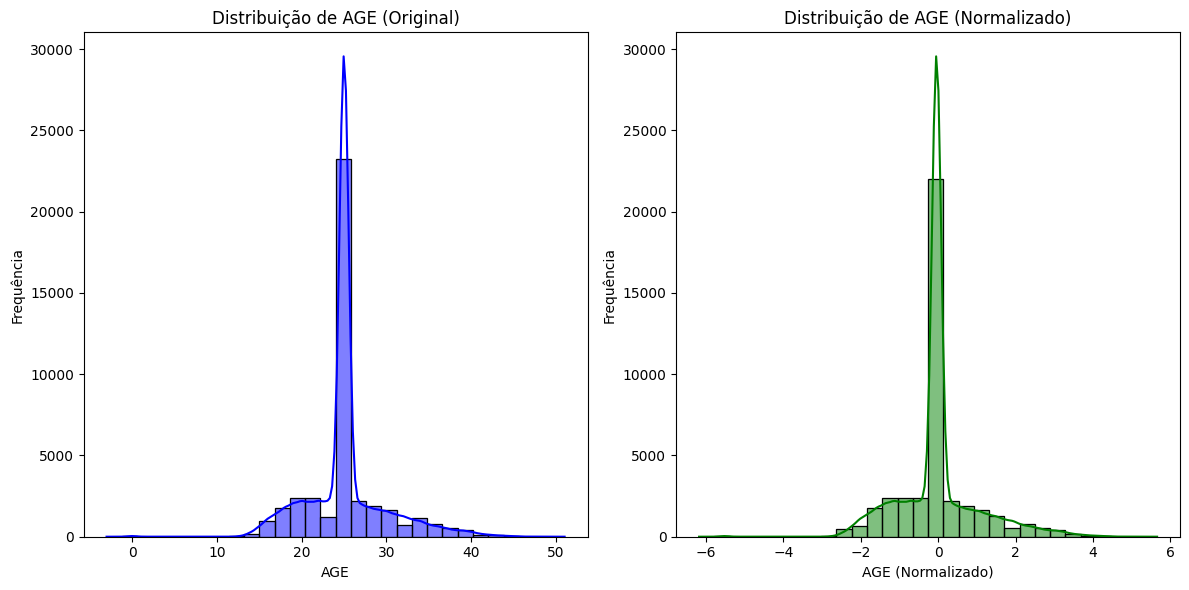

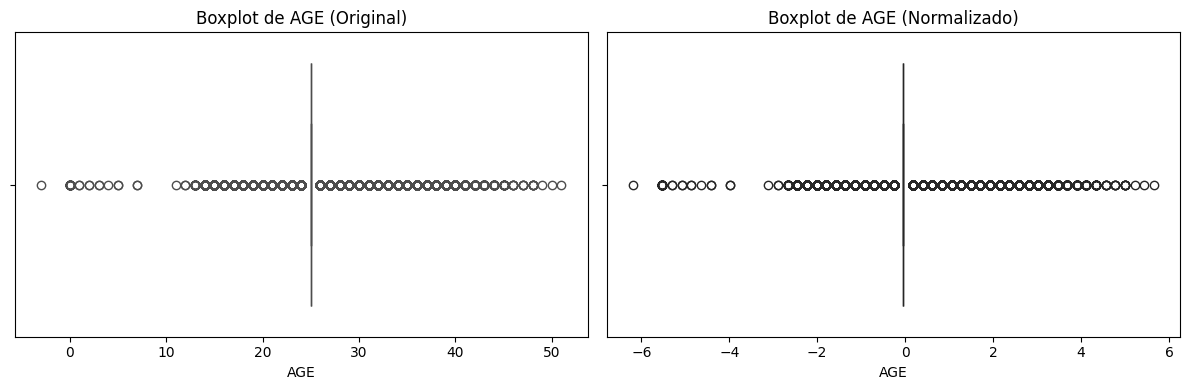

In [ ]:
# Dados originais (antes da normalização)
original_age = data_set['AGE']

# Dados normalizados (após o StandardScaler)
normalized_age = data_encoded['AGE']

# Criar subplots
plt.figure(figsize=(12, 6))

# Histograma antes da normalização
plt.subplot(1, 2, 1)
sns.histplot(original_age, kde=True, bins=30, color='blue')
plt.title('Distribuição de AGE (Original)')
plt.xlabel('AGE')
plt.ylabel('Frequência')

# Histograma após a normalização
plt.subplot(1, 2, 2)
sns.histplot(normalized_age, kde=True, bins=30, color='green')
plt.title('Distribuição de AGE (Normalizado)')
plt.xlabel('AGE (Normalizado)')
plt.ylabel('Frequência')

plt.tight_layout()
plt.show()

print("\n")

# Boxplots
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
sns.boxplot(x=original_age, color='blue')
plt.title('Boxplot de AGE (Original)')

plt.subplot(1, 2, 2)
sns.boxplot(x=normalized_age, color='green')
plt.title('Boxplot de AGE (Normalizado)')

plt.tight_layout()
plt.show()

Diante da constatação de possíveis outliers na variável AGE, buscou-se realizar uma normalização dos dados utilizando o standard scaler, mas poucas diferenças foram percebidas, possívelmente porque os dados contidos no Dataset já estavam normalizados.

###1.6.3 Balanceamento de Classes com SMOTEENN

O SMOTEENN é uma combinação de duas técnicas: SMOTE (Synthetic Minority Oversampling Technique) e ENN (Edited Nearest Neighbors), a qual é utilizada para tratar problemas de desbalanceamento de classes, onde há muitas amostras de uma classe majoritária em relação à minoritária.

In [ ]:
# Separar características (X) e alvo (y)
X = data_encoded.drop("VDRL_RESULT", axis=1)
y = data_encoded["VDRL_RESULT"]

# Dividir em treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Aplicar SMOTEENN
smoteenn = SMOTEENN(random_state=42)
X_resampled, y_resampled = smoteenn.fit_resample(X_train, y_train)

In [ ]:
# Verificar os resultados após o balanceamento
print(f"Distribuição original do conjunto de treino:\n{y_train.value_counts()}")
print(f"Distribuição do conjunto reamostrado:\n{pd.Series(y_resampled).value_counts()}")

Distribuição original do conjunto de treino:
VDRL_RESULT
1.0    32733
0.0      676
Name: count, dtype: int64
Distribuição do conjunto reamostrado:
VDRL_RESULT
0.0    32676
1.0    26675
Name: count, dtype: int64


Neste sentido, diante da constatação da existência de classes desbalanceadas, como é o caso da variável VDRL_RESULT, tornou-se necessária o balanceamento destas classes através de uma técnica que permitisse o oversampling das amostras minoritárias e o undersampling das amostras majoritárias, tal como ocorreu com a variável VDRL_RESULT:

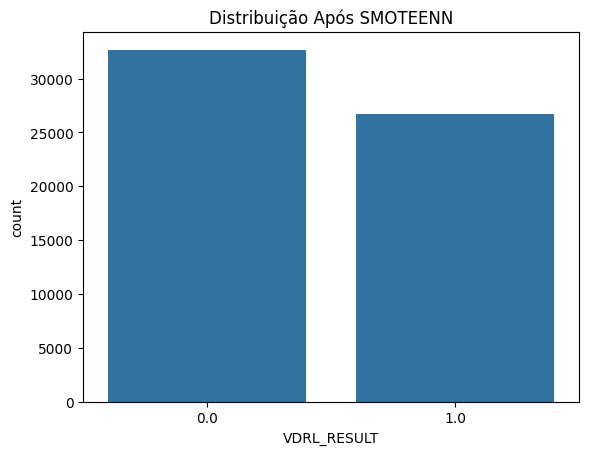

In [ ]:
# Verificar nova distribuição de classes
sns.countplot(x=y_resampled)
plt.title("Distribuição Após SMOTEENN")
plt.show()

## 1.6.4 Divisão em Treino e Teste


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)

print("Pré-processamento concluído!")

Pré-processamento concluído!


# 2. Classificação

Na tarefa de classificação, quatro modelos principais foram selecionados: Árvore de Decisão, Random Forest, AdaBoost e Máquina de Vetores de Suporte (SVM).

In [ ]:
# 1. Decision Tree
dt_model = DecisionTreeClassifier(criterion='gini', max_depth=5, random_state=42)
dt_model.fit(X_train, y_train)
y_pred_dt = dt_model.predict(X_test)
print("Decision Tree - Relatório de Classificação:")
print(classification_report(y_test, y_pred_dt))

Decision Tree - Relatório de Classificação:
              precision    recall  f1-score   support

         0.0       0.79      0.85      0.82      6492
         1.0       0.80      0.73      0.76      5379

    accuracy                           0.80     11871
   macro avg       0.80      0.79      0.79     11871
weighted avg       0.80      0.80      0.79     11871



A Árvore de Decisão foi escolhida por sua simplicidade e interpretabilidade, permitindo uma compreensão clara de como as decisões são tomadas com base nas características dos dados.

In [ ]:
# 2. Random Forest
rf_model = RandomForestClassifier(n_estimators=100, criterion='gini', random_state=42)
rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_test)
print("Random Forest - Relatório de Classificação:")
print(classification_report(y_test, y_pred_rf))

Random Forest - Relatório de Classificação:
              precision    recall  f1-score   support

         0.0       1.00      0.98      0.99      6492
         1.0       0.98      1.00      0.99      5379

    accuracy                           0.99     11871
   macro avg       0.99      0.99      0.99     11871
weighted avg       0.99      0.99      0.99     11871



O modelo Random Forest foi incluído devido ao seu melhor desempenho em relação às árvores de decisão individuais. Por construir múltiplas árvores de decisão em subconjuntos aleatórios dos dados e das características, o Random Forest reduz o overfitting e aumentou a precisão geral do modelo. Além disso, ele fornece uma estimativa da importância de cada variável, o que é valioso para a interpretação dos resultados.

In [ ]:
# 3. SVM
svm_model = SVC(kernel='rbf', C=1.0, gamma='scale', random_state=42)
svm_model.fit(X_train, y_train)
y_pred_svm = svm_model.predict(X_test)
print("SVM - Relatório de Classificação:")
print(classification_report(y_test, y_pred_svm))

SVM - Relatório de Classificação:
              precision    recall  f1-score   support

         0.0       0.84      0.93      0.88      6492
         1.0       0.90      0.79      0.84      5379

    accuracy                           0.87     11871
   macro avg       0.87      0.86      0.86     11871
weighted avg       0.87      0.87      0.87     11871



A Máquina de Vetores de Suporte (SVM) foi considerada por sua eficácia em problemas de classificação, especialmente em conjuntos de dados com alta dimensionalidade. O SVM busca encontrar o hiperplano que melhor separa as classes, maximizando a margem entre os exemplos das diferentes classes.

In [ ]:
# 4. AdaBoost
adaboost_model = AdaBoostClassifier(
    n_estimators=100,
    learning_rate=0.5,
    algorithm="SAMME",  # Define o algoritmo explicitamente
    random_state=42
)
adaboost_model.fit(X_train, y_train)
y_pred_adaboost = adaboost_model.predict(X_test)

print("AdaBoost - Relatório de Classificação:")
print(classification_report(y_test, y_pred_adaboost))

AdaBoost - Relatório de Classificação:
              precision    recall  f1-score   support

         0.0       0.88      0.93      0.91      6492
         1.0       0.91      0.85      0.88      5379

    accuracy                           0.90     11871
   macro avg       0.90      0.89      0.89     11871
weighted avg       0.90      0.90      0.89     11871



O AdaBoost foi selecionado por sua capacidade de melhorar a performance de classificadores fracos, aumentando a sensibilidade para dados desbalanceados, como é o caso da distribuição de sífilis congênita no dataset. Ao dar mais peso aos exemplos mal classificados em iterações anteriores, o AdaBoost aprimora o modelo de forma iterativa, focando nos casos mais difíceis de classificar.

In [ ]:
# Validação Cruzada
kf = KFold(n_splits=10, shuffle=True, random_state=42)

# Função para calcular e exibir a validação cruzada
def evaluate_model(model, X, y, model_name):
    scores = cross_val_score(model, X, y, cv=kf, scoring='f1')
    print(f"{model_name} - F1-Score Médio (10-Fold CV): {scores.mean():.4f}")
    return scores.mean()

# Avaliar todos os modelos
scores = {}

In [ ]:
scores['Decision Tree'] = evaluate_model(dt_model, X_resampled, y_resampled, "Decision Tree")

Decision Tree - F1-Score Médio (10-Fold CV): 0.7736


In [ ]:
scores['Random Forest'] = evaluate_model(rf_model, X_resampled, y_resampled, "Random Forest")

Random Forest - F1-Score Médio (10-Fold CV): 0.9883


In [ ]:
scores['SVM'] = evaluate_model(svm_model, X_resampled, y_resampled, "SVM")

SVM - F1-Score Médio (10-Fold CV): 0.8451


In [ ]:
scores['AdaBoost'] = evaluate_model(adaboost_model, X_resampled, y_resampled, "AdaBoost")

AdaBoost - F1-Score Médio (10-Fold CV): 0.8690


Para avaliar o desempenho desses modelos, foram utilizadas as métricas de Precisão, Recall, F1-Score e Acurácia. A Precisão mede a proporção de verdadeiros positivos em relação ao total de previsões positivas, enquanto o Recall avalia a proporção de verdadeiros positivos em relação ao total de positivos reais. O F1-Score é a média harmônica entre Precisão e Recall, proporcionando um equilíbrio entre as duas métricas. A Acurácia indica a proporção de previsões corretas sobre o total de casos avaliados.

Além disso, foi aplicada a validação cruzada com k=10 folds para garantir a robustez dos resultados e evitar overfitting.

In [ ]:
# Interpretação: Importância das Variáveis (apenas para modelos que fornecem feature importance)
plt.figure(figsize=(10, 6))

<Figure size 1000x600 with 0 Axes>

<Figure size 1000x600 with 0 Axes>

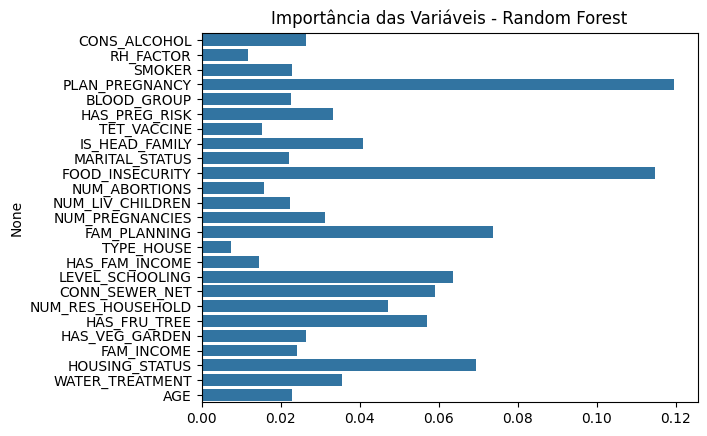

In [ ]:
# Random Forest Feature Importance
importances_rf = rf_model.feature_importances_
sns.barplot(x=importances_rf, y=X_train.columns)
plt.title("Importância das Variáveis - Random Forest")
plt.show()

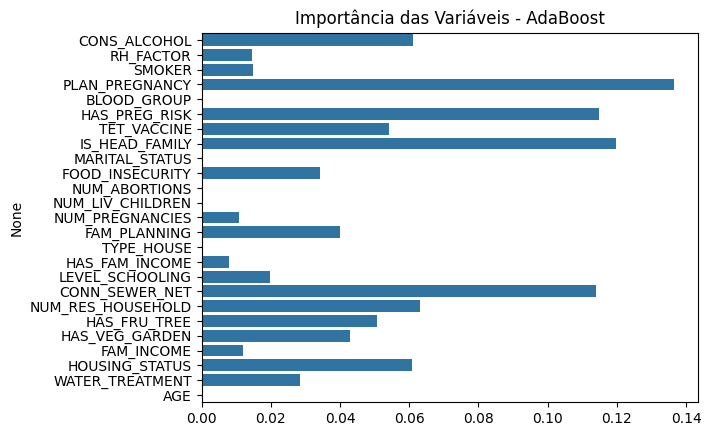

In [ ]:
# AdaBoost Feature Importance
importances_adaboost = adaboost_model.feature_importances_
sns.barplot(x=importances_adaboost, y=X_train.columns)
plt.title("Importância das Variáveis - AdaBoost")
plt.show()

# 3. Regressão

Para a tarefa de regressão, que visa prever a idade materna com base nas variáveis disponíveis, foram escolhidos três modelos: Regressão Linear, Ridge Regression e Random Forest Regressor.

In [ ]:
# Dados de Treino e Teste
X = data_encoded.drop(columns=['AGE'])
y = data_encoded['AGE']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

A Regressão Linear foi selecionada pela sua simplicidade e pela facilidade de interpretação dos coeficientes, permitindo entender como cada variável independente afeta a variável dependente.

Ridge Regression é uma extensão da Regressão Linear que adiciona um termo de regularização aos coeficientes, penalizando coeficientes muito grandes e reduzindo o impacto da colinearidade. Isso resulta em um modelo mais generalizável e com melhor desempenho preditivo em dados não vistos.

O Random Forest Regressor foi escolhido por sua capacidade de capturar relações não lineares e interações complexas entre as variáveis. Semelhante ao Random Forest para classificação, este modelo constrói múltiplas árvores de decisão para regressão e calcula a média das previsões, aumentando a precisão e reduzindo o risco de overfitting.

In [ ]:
# Modelos
models = {
    'Linear Regression': LinearRegression(),
    'Ridge Regression': Ridge(alpha=1.0),
    'Random Forest': RandomForestRegressor(n_estimators=100, random_state=42)
}

# Avaliação dos Modelos com K-Fold Cross Validation
results = {}
kf = KFold(n_splits=10, shuffle=True, random_state=42)

for model_name, model in models.items():
    print(f"\nTreinando e Avaliando o Modelo: {model_name}")
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    # Métricas no conjunto de teste
    mae = mean_absolute_error(y_test, y_pred)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    mape = mean_absolute_percentage_error(y_test, y_pred)

    # Validação cruzada (MAE médio)
    cv_scores = cross_val_score(model, X, y, cv=kf, scoring='neg_mean_absolute_error')
    cv_mae = -np.mean(cv_scores)

    # Armazenar Resultados
    results[model_name] = {'MAE': mae, 'RMSE': rmse, 'MAPE': mape, 'CV_MAE': cv_mae}
    print(f"MAE: {mae:.2f}, RMSE: {rmse:.2f}, MAPE: {mape:.2%}, CV-MAE: {cv_mae:.2f}")


Treinando e Avaliando o Modelo: Linear Regression
MAE: 0.63, RMSE: 0.98, MAPE: 237.73%, CV-MAE: 0.63

Treinando e Avaliando o Modelo: Ridge Regression
MAE: 0.63, RMSE: 0.98, MAPE: 237.72%, CV-MAE: 0.63

Treinando e Avaliando o Modelo: Random Forest
MAE: 0.63, RMSE: 0.91, MAPE: 435.01%, CV-MAE: 0.63


As métricas utilizadas para avaliar os modelos de regressão foram o MAE,  RMSE e o MAPE.


*   O MAE mede a média das diferenças absolutas entre os valores previstos e observados, proporcionando uma interpretação direta do erro médio.


*   O RMSE dá maior peso aos erros maiores, sendo útil para penalizar previsões com grandes desvios.

*   O MAPE expressa o erro médio em termos percentuais, facilitando a compreensão do desempenho do modelo em relação aos valores reais.

Assim como na classificação, foi aplicada a validação cruzada com k=10 folds para os modelos de regressão. Esse procedimento assegura que os resultados não sejam influenciados por uma divisão específica dos dados e que o modelo tenha um desempenho consistente em diferentes subconjuntos do dataset.

In [ ]:
# Comparação de Métricas
results_df = pd.DataFrame(results).T
print("\nResultados dos Modelos:")
print(results_df)


Resultados dos Modelos:
                        MAE      RMSE      MAPE    CV_MAE
Linear Regression  0.632292  0.982686  2.377301  0.634359
Ridge Regression   0.632288  0.982686  2.377187  0.634356
Random Forest      0.631548  0.910355  4.350091  0.631471


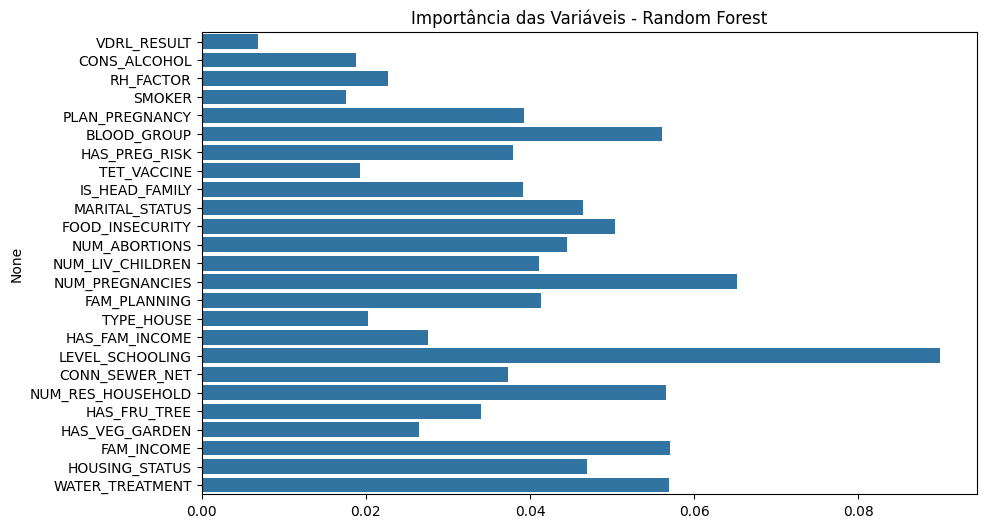

In [ ]:
# Interpretação da Importância das Variáveis
# 1. Random Forest
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X, y)
rf_importances = rf_model.feature_importances_

plt.figure(figsize=(10, 6))
sns.barplot(x=rf_importances, y=X.columns)
plt.title("Importância das Variáveis - Random Forest")
plt.show()

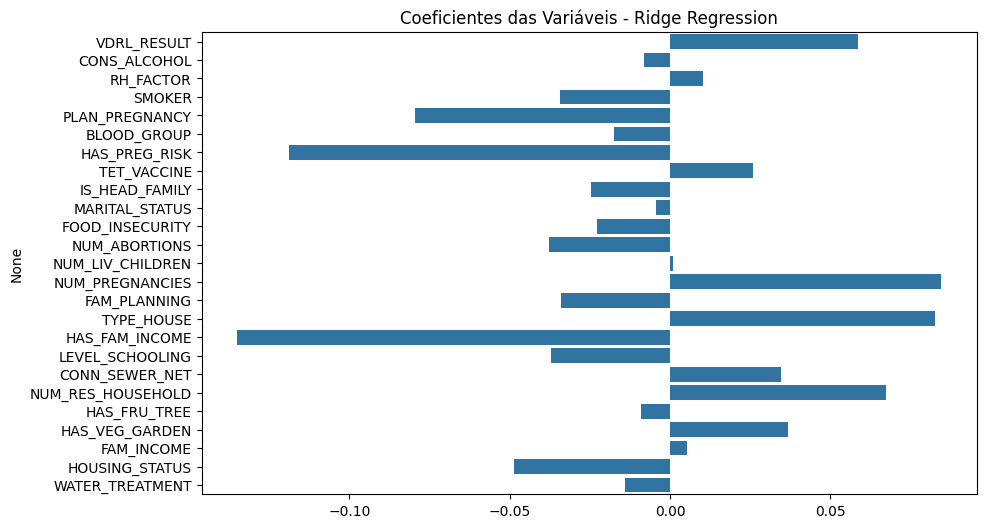

In [ ]:
# 2. Modelos Lineares (Coeficientes)
linear_model = Ridge(alpha=1.0)  # Ridge Regression
linear_model.fit(X, y)
ridge_coefficients = linear_model.coef_

plt.figure(figsize=(10, 6))
sns.barplot(x=ridge_coefficients, y=X.columns)
plt.title("Coeficientes das Variáveis - Ridge Regression")
plt.show()

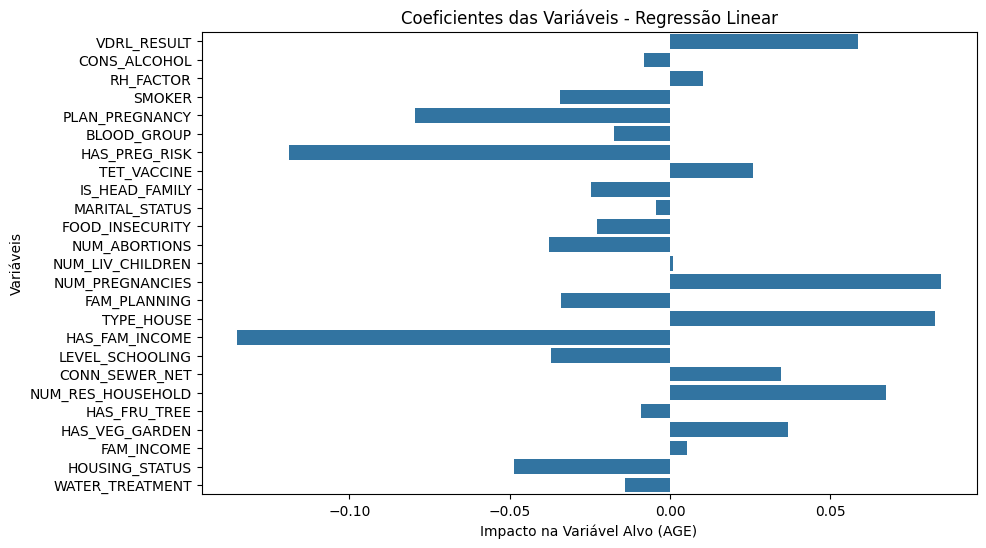

In [ ]:
# 3. Interpretação para Modelos Lineares (Regressão Linear e Ridge)
linear_model = LinearRegression()
linear_model.fit(X, y)

# Coeficientes da Regressão Linear
linear_coefficients = linear_model.coef_

plt.figure(figsize=(10, 6))
sns.barplot(x=linear_coefficients, y=X.columns)
plt.title("Coeficientes das Variáveis - Regressão Linear")
plt.xlabel("Impacto na Variável Alvo (AGE)")
plt.ylabel("Variáveis")
plt.show()

#4. Análise de Fatores e Discussão sobre Prevenção

Com base nos dados fornecidos e nos resultados do modelo, o objetivou-se explorar o impacto dos fatores clínicos e sociodemográficos em desfechos de saúde, especificamente na prevenção de sífilis congênita.

1. Identificação de Variáveis que Contribuem para a Sífilis Congênita

A partir dos gráficos de importância das variáveis (Random Forest, AdaBoost) e dos coeficientes das regressões, as seguintes variáveis foram destacadas como relevantes:

Variáveis de Destaque:

Nível Educacional (LEVEL_SCHOOLING):

*   Fortemente associado à prevenção de sífilis congênita. Baixo nível educacional pode indicar dificuldade de acesso à informação sobre saúde sexual e reprodutiva.

*   Sugestão: Programas de educação em saúde voltados para mulheres de baixa escolaridade.

Planejamento Familiar (PLAN_PREGNANCY):

*   Mulheres que planejam a gravidez têm maior probabilidade de fazer acompanhamento pré-natal adequado.

*   Sugestão: Reforçar a distribuição de métodos contraceptivos e aconselhamento familiar.

Condição Socioeconômica (FAM_INCOME):

*   Famílias com menor renda possuem menos acesso a serviços de saúde.

*   Sugestão: Políticas públicas de saúde que garantam acesso a cuidados pré-natais gratuitos.

Número de Gravidezes (NUM_PREGNANCIES):

*   Gravidezes múltiplas podem estar associadas a menor acompanhamento médico.

*   Sugestão: Implementar programas de monitoramento contínuo para mulheres multíparas.

Vacinação Antitetânica (TET_VACCINE):

*   Indicativo de acesso ao sistema de saúde durante a gestação.

*   Sugestão: Intensificar campanhas de vacinação e incluir exames preventivos de sífilis nesses momentos.

Tratamento de Água (WATER_TREATMENT):

*   Regiões com ausência de tratamento adequado apresentam maior incidência de sífilis.
	*   Sugestão: Melhoria de infraestrutura básica como fornecimento de água tratada.

2. Políticas de Saúde Pública e Intervenções Preventivas

Com base nos resultados, aqui estão sugestões de políticas e ações para prevenção de sífilis congênita:

Educação em Saúde:

Treinamento de Profissionais de Saúde:
*   Capacitação para identificar e tratar precocemente casos de sífilis durante a gestação;

*   A ausência de capacitação foi destacada como um desafio significativo na identificação de casos.

Campanhas Comunitárias:

*   Distribuição de materiais educativos sobre saúde sexual e prevenção de ISTs, adaptados ao público-alvo de baixa escolaridade.

Acesso ao Sistema de Saúde:

*   Expansão de Programas como o Mãe Coruja;

*   Monitoramento contínuo de gestantes vulneráveis, garantindo exames regulares (como o VDRL) e acompanhamento nutricional;
*   O programa “Mãe Coruja Pernambucana” foi fundamental para o monitoramento de gestantes em áreas vulneráveis.

Teste e Tratamento Rápidos:

*   Disponibilização universal do teste rápido de sífilis, com tratamento imediato em casos positivos.

Apoio Econômico:

* Auxílio Financeiro;
* Ampliar programas de renda mínima para gestantes, incentivando-as a buscar cuidados pré-natais.

3. Relacionamento com Resultados do Modelo

Os modelos preditivos reforçam que fatores educacionais, econômicos e de acesso à saúde têm papel crítico na incidência de sífilis congênita. Os insights gerados podem ser usados para:

*   Identificar grupos de maior risco (com base nas variáveis mais importantes) e direcionar recursos e políticas a essas populações.

*   Monitoramento em Saúde Pública;

*   Usar modelos preditivos para antecipar áreas ou indivíduos de alto risco.